# Data Cleaning:

## 1. Perform a preliminary data inspection and data cleaning.

### a. Check for missing data and formulate an apt strategy to treat them.

### b. Remove duplicate data records.

### c. Perform descriptive analytics on the given data.

# Data Transformation:

## 2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

### a. Create month cohorts and analyze active customers for each cohort.

### b. Analyze the retention rate of customers.

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
filepath = os.getcwd()+'/train.xlsx'
filepath2 = os.getcwd()+'/test.xlsx'

train_dataset = pd.read_excel(filepath)
test_dataset = pd.read_excel(filepath2)
train_dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [3]:
test_dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,562955,84660c,PINK STITCHED WALL CLOCK,3,2011-08-11 10:14:00,7.46,NaN,United Kingdom
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365.0,United Kingdom
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom
3,577078,47369B,BLUE GREEN EMBROIDERY COSMETIC BAG,1,2011-11-17 15:17:00,5.79,NaN,United Kingdom
4,C569891,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,2011-10-06 15:46:00,4.95,13924.0,United Kingdom


In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB


In [5]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162573 entries, 0 to 162572
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    162573 non-null  object        
 1   StockCode    162573 non-null  object        
 2   Description  162082 non-null  object        
 3   Quantity     162573 non-null  int64         
 4   InvoiceDate  162573 non-null  datetime64[ns]
 5   UnitPrice    162573 non-null  float64       
 6   CustomerID   121753 non-null  float64       
 7   Country      162573 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 9.9+ MB


## Treating Null values

In [6]:
train_dataset.isnull().sum()

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64

In [7]:
test_dataset.isnull().sum()

InvoiceNo          0
StockCode          0
Description      491
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     40820
Country            0
dtype: int64

In [8]:
train_customerNullIndex = train_dataset['CustomerID'].index[train_dataset.CustomerID.apply(np.isnan)]
test_customerNullIndex = test_dataset['CustomerID'].index[test_dataset.CustomerID.apply(np.isnan)]

## After Studying Dataset I've found that..
### None of the Entries with missing CustomerID are matched with any Duplicated Invoice having a CustomerID
### Hence removing all the rows with null values...

In [9]:
train_dataset.dropna(subset = ['CustomerID'], inplace = True)

In [10]:
test_dataset.dropna(subset = ['CustomerID'], inplace = True)

In [11]:
train_dataset[(train_dataset['Quantity']<0) | (train_dataset['UnitPrice']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
415,C549269,75049L,LARGE CIRCULAR MIRROR MOBILE,-9,2011-04-07 12:47:00,0.85,16701.0,United Kingdom
487,C572109,23064,CINDERELLA CHANDELIER,-1,2011-10-20 18:24:00,49.95,13350.0,United Kingdom
613,C537860,22180,RETROSPOT LAMP,-1,2010-12-08 16:15:00,9.95,16252.0,United Kingdom
834,C560540,23240,SET OF 4 KNICK KNACK TINS DOILEY,-1,2011-07-19 12:26:00,4.15,12415.0,Australia
874,C542910,20726,LUNCH BAG WOODLAND,-1,2011-02-01 15:38:00,1.45,17511.0,United Kingdom
...,...,...,...,...,...,...,...,...
379170,C567359,21209,MULTICOLOUR HONEYCOMB FAN,-2,2011-09-19 16:33:00,0.39,15201.0,United Kingdom
379173,C554521,22848,BREAD BIN DINER STYLE PINK,-1,2011-05-24 17:11:00,16.95,14407.0,United Kingdom
379223,C555600,23204,CHARLOTTE BAG APPLES DESIGN,-3,2011-06-06 11:17:00,0.85,12633.0,Germany
379260,C542604,22666,RECIPE BOX PANTRY YELLOW DESIGN,-1,2011-01-30 12:35:00,2.95,13148.0,United Kingdom


In [12]:
train_dataset = train_dataset[(train_dataset['Quantity']>0) & (train_dataset['UnitPrice']>0)]

test_dataset = test_dataset[(test_dataset['Quantity']>0) & (test_dataset['UnitPrice']>0)]

In [13]:
train_dataset.StockCode.duplicated().sum()

# train_dataset.drop_duplicates(inplace = True)

275217

In [14]:
test_dataset.duplicated().sum()

test_dataset.drop_duplicates(inplace = True)

In [15]:
train_dataset.shape

(278828, 8)

In [16]:
test_dataset.shape

(118591, 8)

In [17]:
train_dataset.describe()

,Quantity,UnitPrice,CustomerID
count,278828.000000,278828.000000,278828.000000
mean,13.110566,3.110506,15294.773186
std,212.425378,19.643984,1711.818758
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16794.000000
max,80995.000000,4161.060000,18287.000000


In [18]:
test_dataset.describe()

,Quantity,UnitPrice,CustomerID
count,118591.000000,118591.000000,118591.000000
mean,12.741321,3.133601,15291.474412
std,42.465304,27.037872,1716.445958
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13952.000000
50%,6.000000,1.950000,15152.000000
75%,12.000000,3.750000,16800.000000
max,3114.000000,8142.750000,18287.000000


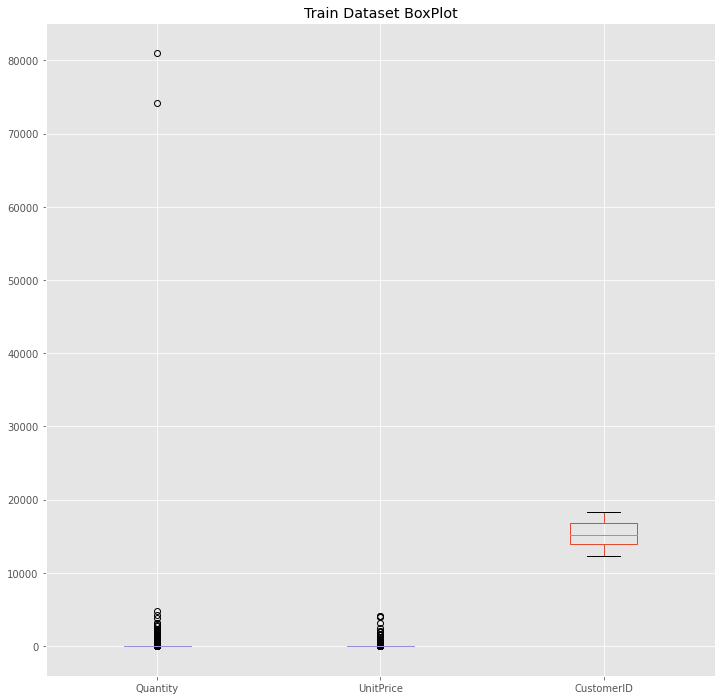

In [19]:
style.use('ggplot')
plt.figure(figsize = (12,12))
train_dataset.boxplot()
plt.title('Train Dataset BoxPlot')
plt.show()

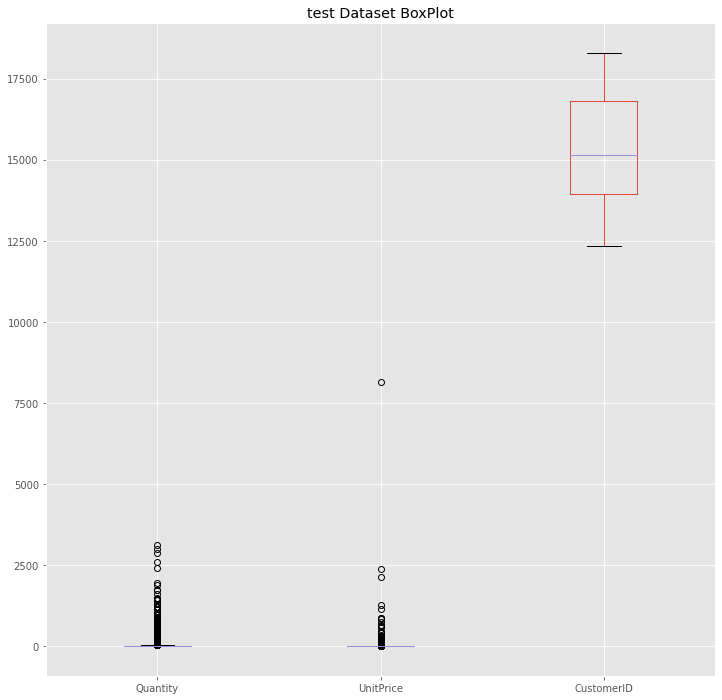

In [20]:
style.use('ggplot')
plt.figure(figsize = (12,12))
test_dataset.boxplot()
plt.title('test Dataset BoxPlot')
plt.show()

In [21]:
train_dataset.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.004358,-0.005572
UnitPrice,-0.004358,1.000000,-0.013418
CustomerID,-0.005572,-0.013418,1.000000


In [22]:
test_dataset.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.015610,-0.022495
UnitPrice,-0.015610,1.000000,-0.006863
CustomerID,-0.022495,-0.006863,1.000000


Text(0.5, 1.0, 'Scatter Plot')

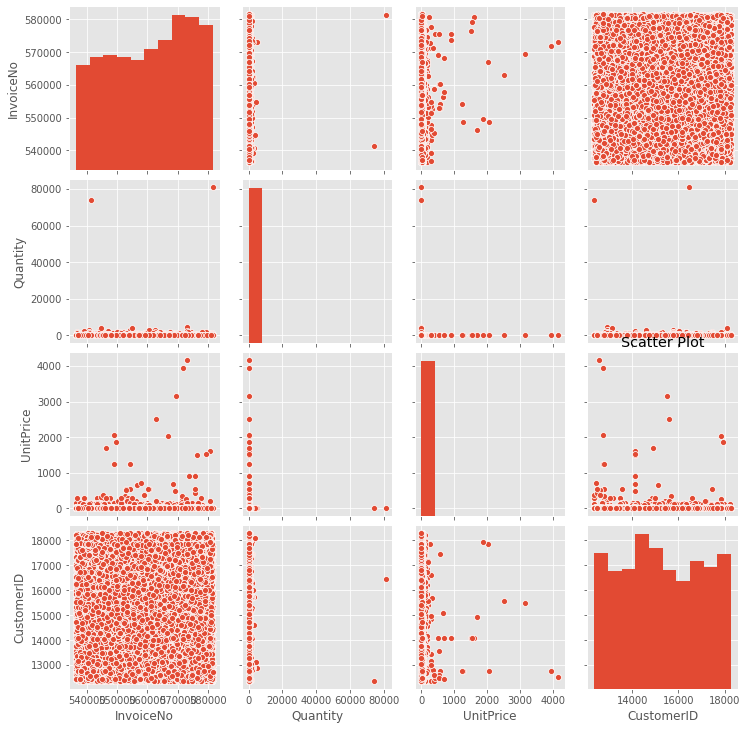

In [23]:
sns.pairplot(train_dataset)
plt.title('Scatter Plot')

In [24]:
#According to youtube video...
import datetime as dt
def getMonth(x):
    return dt.datetime(x.year, x.month, 1)

In [25]:
train_dataset['InvoiceMonth'] = train_dataset['InvoiceDate'].apply(getMonth)

test_dataset['InvoiceMonth'] = test_dataset['InvoiceDate'].apply(getMonth)

In [26]:
train_dataset['InvoiceMonth']

1        2011-06-01
2        2011-05-01
3        2011-01-01
4        2010-12-01
5        2011-05-01
            ...    
379328   2011-09-01
379330   2011-05-01
379333   2011-10-01
379334   2011-07-01
379335   2011-11-01
Name: InvoiceMonth, Length: 278828, dtype: datetime64[ns]

In [27]:
train_dataset['CohortMonth'] = train_dataset.groupby('CustomerID')['InvoiceMonth'].transform('min')

test_dataset['CohortMonth'] = test_dataset.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [28]:
train_dataset['CohortMonth']

1        2011-02-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
5        2011-02-01
            ...    
379328   2011-02-01
379330   2010-12-01
379333   2011-10-01
379334   2011-04-01
379335   2011-02-01
Name: CohortMonth, Length: 278828, dtype: datetime64[ns]

In [29]:
train_dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-01,2011-02-01
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05-01,2010-12-01
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01-01,2010-12-01
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-01,2010-12-01
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05-01,2011-02-01


In [30]:
train_dataset[train_dataset['CustomerID'] == 16126]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-01,2011-02-01
777,564752,23298,SPOTTY BUNTING,21,2011-08-30 10:07:00,4.95,16126.0,United Kingdom,2011-08-01,2011-02-01
1532,564752,20971,PINK BLUE FELT CRAFT TRINKET BOX,36,2011-08-30 10:07:00,1.25,16126.0,United Kingdom,2011-08-01,2011-02-01
12973,575687,22273,FELTCRAFT DOLL MOLLY,18,2011-11-10 16:03:00,2.95,16126.0,United Kingdom,2011-11-01,2011-02-01
23865,575687,22065,CHRISTMAS PUDDING TRINKET POT,48,2011-11-10 16:03:00,0.39,16126.0,United Kingdom,2011-11-01,2011-02-01
...,...,...,...,...,...,...,...,...,...,...
357272,544111,22149,FELTCRAFT 6 FLOWER FRIENDS,12,2011-02-16 11:18:00,2.10,16126.0,United Kingdom,2011-02-01,2011-02-01
358962,575687,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,36,2011-11-10 16:03:00,0.85,16126.0,United Kingdom,2011-11-01,2011-02-01
361410,564752,23126,FELTCRAFT GIRL AMELIE KIT,16,2011-08-30 10:07:00,4.95,16126.0,United Kingdom,2011-08-01,2011-02-01
363047,564752,22457,NATURAL SLATE HEART CHALKBOARD,18,2011-08-30 10:07:00,2.95,16126.0,United Kingdom,2011-08-01,2011-02-01


## Create a cohort
### So far we've been doing admin, inspecting and cleaning up the data...now we will create a cohort which analyse and visualise...

## Here we are going to create a cohort index, this will give the month lapsed number first and last transaction.

In [31]:
# when passed the datetime column this function splits the year month and day...

def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [32]:
invoice_year, invoice_month, invoice_day = get_date(train_dataset, 'InvoiceMonth')

test_invoice_year, test_invoice_month, test_invoice_day = get_date(test_dataset, 'InvoiceMonth')

In [33]:
invoice_month[:30]

1      6
2      5
3      1
4     12
5      5
7      9
9     10
10    12
12     2
13    10
14     2
15    10
16     6
17    11
18    10
19    11
20    12
23     2
24    10
25    10
26    11
27    11
29     5
30     6
32     7
34    11
36     1
37     5
38     8
39     8
Name: InvoiceMonth, dtype: int64

In [34]:
invoice_year[:30]

1     2011
2     2011
3     2011
4     2010
5     2011
7     2011
9     2011
10    2010
12    2011
13    2011
14    2011
15    2011
16    2011
17    2011
18    2011
19    2011
20    2010
23    2011
24    2011
25    2011
26    2011
27    2011
29    2011
30    2011
32    2011
34    2011
36    2011
37    2011
38    2011
39    2011
Name: InvoiceMonth, dtype: int64

In [35]:
cohort_year, cohort_month, cohort_day = get_date(train_dataset, 'CohortMonth')

test_cohort_year, test_cohort_month, test_cohort_day = get_date(test_dataset, 'CohortMonth')

In [36]:
cohort_month

1          2
2         12
3         12
4         12
5          2
          ..
379328     2
379330    12
379333    10
379334     4
379335     2
Name: CohortMonth, Length: 278828, dtype: int64

In [37]:
cohort_year

1         2011
2         2010
3         2010
4         2010
5         2011
          ... 
379328    2011
379330    2010
379333    2011
379334    2011
379335    2011
Name: CohortMonth, Length: 278828, dtype: int64

In [38]:
year_diff = invoice_year - cohort_year
test_year_diff = test_invoice_year - test_cohort_year

In [39]:
year_diff[:10]

1     0
2     1
3     1
4     0
5     0
7     0
9     0
10    0
12    0
13    0
dtype: int64

In [40]:
month_diff = invoice_month - cohort_month
test_month_diff = test_invoice_month - test_cohort_month

In [41]:
month_diff[:10]

1      4
2     -7
3    -11
4      0
5      3
7      6
9      6
10     0
12     0
13     0
dtype: int64

In [42]:
#this is the index showing till how much time the customer was there with us from its first purchase till this one invoice....
#we got the year difference(converted it into months) and month Difference...
# +1 because it will make the calculation as the starting of new month....
train_dataset['CohortIndex'] = year_diff * 12 + month_diff + 1
test_dataset['CohortIndex'] = test_year_diff * 12 + test_month_diff + 1

In [43]:
train_dataset['CohortIndex']

1          5
2          6
3          2
4          1
5          4
          ..
379328     8
379330     6
379333     1
379334     4
379335    10
Name: CohortIndex, Length: 278828, dtype: int64

## Cohort Analysis 1


In [50]:
cohort_data = train_dataset.groupby(['CohortMonth','CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()

test_cohort_data = test_dataset.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()

In [51]:
cohort_count = cohort_data.pivot_table(index=  'CohortMonth',
                                      columns= 'CohortIndex',
                                      values = 'CustomerID')

test_cohort_count = test_cohort_data.pivot_table(index = 'CohortMonth',
                                                columns = 'CohortIndex',
                                                values = 'CustomerID')

## here are the active customers for each cohort...

In [46]:
cohort_count

In [52]:
test_cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,827.0,291.0,263.0,313.0,295.0,327.0,302.0,281.0,286.0,318.0,310.0,420.0,213.0
2011-01-01,400.0,84.0,109.0,89.0,130.0,111.0,102.0,96.0,119.0,124.0,142.0,48.0,NaN
2011-02-01,354.0,59.0,67.0,97.0,88.0,85.0,93.0,98.0,86.0,109.0,26.0,NaN,NaN
2011-03-01,434.0,61.0,103.0,90.0,96.0,74.0,106.0,100.0,119.0,37.0,NaN,NaN,NaN
2011-04-01,293.0,58.0,55.0,56.0,53.0,67.0,63.0,75.0,20.0,NaN,NaN,NaN,NaN
2011-05-01,277.0,47.0,47.0,46.0,57.0,65.0,73.0,24.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,234.0,34.0,34.0,59.0,54.0,73.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,186.0,30.0,39.0,41.0,48.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,164.0,30.0,38.0,40.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create retention as percentage...

In [47]:
cohort_size = cohort_count.iloc[:,0]
cohort_size

In [53]:
test_cohort_size = test_cohort_count.iloc[:,0]

## Here is the Retention Rate of Customer...

In [48]:
retention = cohort_count.divide(cohort_size, axis = 0)
retention.round(3)
retention

In [54]:
test_retention = test_cohort_count.divide(cohort_size, axis = 0)
test_retention.round(3)
test_retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,0.948394,0.333716,0.301606,0.358945,0.338303,0.375000,0.346330,0.322248,0.327982,0.364679,0.355505,0.481651,0.244266
2011-01-01,0.961538,0.201923,0.262019,0.213942,0.312500,0.266827,0.245192,0.230769,0.286058,0.298077,0.341346,0.115385,NaN
2011-02-01,0.938992,0.156499,0.177719,0.257294,0.233422,0.225464,0.246684,0.259947,0.228117,0.289125,0.068966,NaN,NaN
2011-03-01,0.964444,0.135556,0.228889,0.200000,0.213333,0.164444,0.235556,0.222222,0.264444,0.082222,NaN,NaN,NaN
2011-04-01,0.979933,0.193980,0.183946,0.187291,0.177258,0.224080,0.210702,0.250836,0.066890,NaN,NaN,NaN,NaN
2011-05-01,0.978799,0.166078,0.166078,0.162544,0.201413,0.229682,0.257951,0.084806,NaN,NaN,NaN,NaN,NaN
2011-06-01,0.959016,0.139344,0.139344,0.241803,0.221311,0.299180,0.086066,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,0.978947,0.157895,0.205263,0.215789,0.252632,0.110526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,0.976190,0.178571,0.226190,0.238095,0.119048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## HeatMap for Training Data Retention Rate....

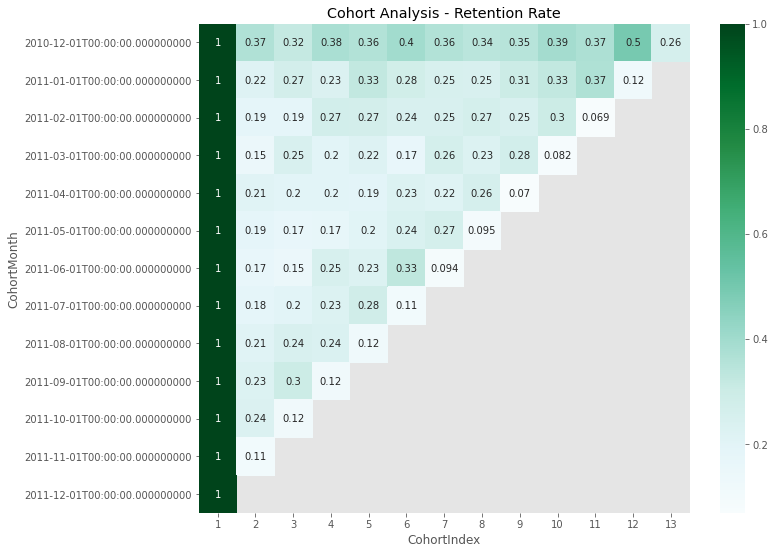

In [49]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention,
           annot = True,
           cmap = 'BuGn')
plt.show()

## HeatMap for Testing Data Retention Rate....

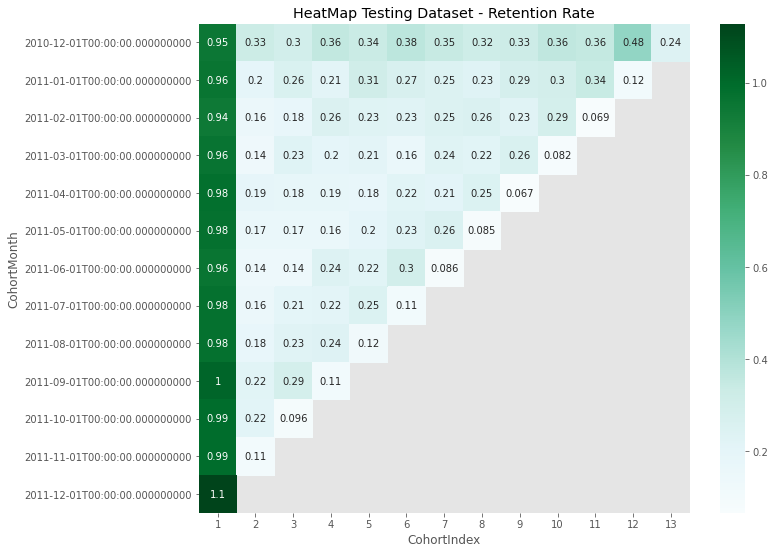

In [56]:
plt.figure(figsize = (11,9))
plt.title('HeatMap Testing Dataset - Retention Rate')
sns.heatmap(data = test_retention, annot = True, cmap = 'BuGn')
plt.show()